# Reading in Training Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSDA1050/on3_training_data.csv')
df.sample(5)

,Name,Legacy Value,Sport,Rank,School,Hometown,Position,Height,Weight,Age,Insta followers,TIktok followers,Twitter followers,Total Followers,NIL
437,George Fitzpatrick,No,Football,730,Cherry Creek,"Englewood, CO",OT,6-5.25,274,NaN,3.9K,NaN,NaN,NaN,$16.7K
782,Levontai Summersett,No,Football,1098,Ida S. Baker,"Cape Coral, FL",NaN,NaN,NaN,NaN,1.3K,NaN,NaN,NaN,$13.3K
968,Raleigh Collins III,No,Football,380,Neumann Goretti,"Philadelphia, PA",LB,6-3,185,NaN,4.2K,17.9K,2.1K,NaN,$22K
1203,Zachariah Branch,No,Football,34,Bishop Gorman,"Las Vegas, NV",WR,5-10,176,NaN,33K,34K,4.5K,NaN,$59K
1449,Kam Craft,No,Basketball,191,The Skill Factory,"Atlanta, GA",SG,6.5',180,18.0,7.3K,1.5K,1.5K,NaN,$13.4K


# Cleaning Data

## Cleaning Numerical Values

Numercial Values:

1.   Height - in inches
2.   Weight - remove all non numeric values
2.   Followers - remove the k and multiply by 1000
3.   NIL - remove the $ and multiply by 1000
4.   Total Followers -  calculate using other follower cols






### Height

In [ ]:
clean_height_df = df.copy()

In [ ]:
clean_height_df.loc[~(clean_height_df['Height'].str.contains('-', na=False)), 'Height_feet'] = clean_height_df['Height']

In [ ]:
clean_height_df['Height_feet'] = clean_height_df['Height_feet'].str.extract('(\d+.\d+)', expand=False)

In [ ]:
clean_height_df.loc[(clean_height_df['Height'].str.contains('-', na=False)), 'Height_feet'] = clean_height_df['Height'].str.split('-').str[0]

In [ ]:
clean_height_df[['Height', 'Height_feet']].sample(25)

,Height,Height_feet
195,6-2,6
1001,6-2,6
1470,6.4',6.4
1198,6-5,6
892,6-2,6
1032,87.5,87.5
1259,6.0',6.0
236,6-6,6
1531,6.7',6.7
529,6-2,6


In [ ]:
clean_height_df.loc[(clean_height_df['Height'].str.contains('-', na=False)), 'Height_in'] = clean_height_df['Height'].str.split('-').str[1]

In [ ]:
clean_height_df[['Height', 'Height_feet', "Height_in"]].sample(25)

,Height,Height_feet,Height_in
204,6-1,6,1
56,6-4,6,4
533,6-5,6,5
1081,6-1,6,1
338,6-3,6,3
1356,6.1',6.1,NaN
1512,6.6',6.6,NaN
222,6-0,6,0
18,5-10,5,10
1518,6.7',6.7,NaN


In [ ]:
clean_height_df['Height_in_Inches'] = clean_height_df['Height_feet'].replace(pd.NA, '0').astype(float) * 12 + clean_height_df['Height_in'].replace(pd.NA, '0').astype(float)
clean_height_df['Height_in_Inches'] = clean_height_df['Height_in_Inches'].astype(int)

In [ ]:
clean_height_df[['Height', 'Height_feet', 'Height_in', 'Height_in_Inches']].sample(25)

,Height,Height_feet,Height_in,Height_in_Inches
1435,6.6',6.6,NaN,79
921,6-6,6,6,78
501,6-8,6,8,80
834,NaN,NaN,NaN,0
166,6-6,6,6,78
1361,6.10',6.10,NaN,73
437,6-5.25,6,5.25,77
1055,6-4,6,4,76
553,5-10,5,10,70
891,5-9,5,9,69


### Weight

In [ ]:
clean_weight_df = clean_height_df.copy()

In [ ]:
def clean_weight(x):

  if pd.isna(x):
    return pd.NA
  if 'NATL' in x:
    return pd.NA
  else:
    return float(x)

In [ ]:
clean_weight_df['Weight_in_Kg'] = clean_weight_df['Weight'].apply(lambda x: clean_weight(x))

In [ ]:
clean_weight_df[['Weight','Weight_in_Kg']].sample(10)

,Weight,Weight_in_Kg
1467,170,170.0
71,NaN,<NA>
1253,180,180.0
80,301,301.0
1042,190,190.0
358,211,211.0
825,200,200.0
190,175,175.0
290,NaN,<NA>
523,180,180.0


### Followers

In [ ]:
clean_follower_df = clean_weight_df.copy()

In [ ]:
clean_follower_df.sample(5)

,Name,Legacy Value,Sport,Rank,School,Hometown,Position,Height,Weight,Age,Insta followers,TIktok followers,Twitter followers,Total Followers,NIL,Height_feet,Height_in,Height_in_Inches,Weight_in_Kg
749,Khamari Terrell,No,Football,531,Shoemaker,"Killeen, TX",CB,6-1,170,NaN,2.5K,156,1.7K,NaN,$19.4K,6,1,73,170.0
511,Jadarian Price,No,Football,880,Denison,"Denison, TX",RB,5-11,180,NaN,2.7K,NaN,NaN,NaN,$15K,5,11,71,180.0
1167,Vance Bolyard,No,Football,1052,Northern Guilford,"Greensboro, NC",TE,NaN,NaN,NaN,1.9K,NaN,NaN,NaN,$13.6K,NaN,NaN,0,<NA>
590,Jayden Rowe,No,Football,289,Union,"Tulsa, OK",CB,6-3,210,NaN,3.8K,NaN,NaN,NaN,$25K,6,3,75,210.0
1052,Sioape Vatikani,No,Football,1326,Bishop Manogue,"Reno, NV",IOL,6-3,260,NaN,1.1K,NaN,NaN,NaN,$11.1K,6,3,75,260.0


In [ ]:
def remove_k_m(x):

  x_to_int = 0

  if pd.isna(x):
    x_to_int = 0
  elif 'M' in x:
    x_to_int = int(float(x.split('M')[0])*1000000)
  elif 'K' in x:
    x_to_int = int(float(x.split('K')[0])*1000)
  else:
    x_to_int = int(x)
  
  return x_to_int

In [ ]:
remove_k_m('6.2M')

6200000

In [ ]:
clean_follower_df['Followers Instagram'] = clean_follower_df['Insta followers'].apply(lambda x: remove_k_m(x))

In [ ]:
clean_follower_df[['Insta followers', 'Followers Instagram']].sample(25)

,Insta followers,Followers Instagram
1335,4.4K,4400
290,5.1K,5100
1226,114K,114000
916,16.1K,16100
42,3K,3000
1126,9.8K,9800
172,2.4K,2400
742,11.7K,11700
280,5.8K,5800
1427,483,483


In [ ]:
clean_follower_df['Followers Tiktok'] = clean_follower_df['TIktok followers'].apply(lambda x: remove_k_m(x))

In [ ]:
clean_follower_df[['TIktok followers', 'Followers Tiktok']].sample(25)

,TIktok followers,Followers Tiktok
1031,NaN,0
1030,15.7K,15700
938,NaN,0
1377,48,48
388,NaN,0
836,86,86
749,156,156
351,731,731
346,NaN,0
383,NaN,0


In [ ]:
clean_follower_df['Followers Twitter'] = clean_follower_df['Twitter followers'].apply(lambda x: remove_k_m(x))

In [ ]:
clean_follower_df[['Twitter followers', 'Followers Twitter']].sample(25)

,Twitter followers,Followers Twitter
982,NaN,0
546,NaN,0
891,NaN,0
226,775,775
313,1.1K,1100
390,NaN,0
665,2.4K,2400
235,4.4K,4400
99,922,922
1061,4.8K,4800


In [ ]:
clean_follower_df['Total Followers'] = clean_follower_df['Followers Instagram'] + clean_follower_df['Followers Tiktok'] + clean_follower_df['Followers Twitter']

In [ ]:
clean_follower_df[['Followers Instagram','Followers Tiktok','Followers Twitter','Total Followers']].sample(10)

,Followers Instagram,Followers Tiktok,Followers Twitter,Total Followers
939,1,0,0,1
909,5200,0,0,5200
599,1900,0,0,1900
538,6200,0,0,6200
742,11700,0,0,11700
98,4500,0,0,4500
849,5200,0,0,5200
140,4000,0,0,4000
753,8400,6,10500,18906
955,5200,0,0,5200


### NIL Value

In [ ]:
clean_nil_df = clean_follower_df.copy()

In [ ]:
def clean_nil(x):
  nil = 0

  if pd.isna(x):
    nil = 0
  elif 'M' in x:
    nil = int(float(x.replace('$','').split('M')[0])*1000000)
  elif 'K' in x:
    nil = int(float(x.replace('$','').split('K')[0])*1000)
  else:
    nil = int(x.replace('$',''))

  return nil

In [ ]:
clean_nil_df['NIL Value'] = clean_nil_df['NIL'].apply(lambda x: clean_nil(x))

In [ ]:
clean_nil_df[['NIL', 'NIL Value']].sample(10)

,NIL,NIL Value
916,$32K,32000
884,$13K,13000
886,$14K,14000
1507,NaN,0
540,$13.9K,13900
569,$16K,16000
903,$8.5K,8500
391,$21K,21000
824,$18K,18000
780,$40K,40000


In [ ]:
clean_nil_df[(clean_nil_df['NIL Value'] == 0)].count()

Name                   59
Legacy Value           59
Sport                  59
Rank                   59
School                 59
Hometown               59
Position               59
Height                 59
Weight                 59
Age                    59
Insta followers        59
TIktok followers       48
Twitter followers      59
Total Followers        59
NIL                     0
Height_feet            59
Height_in               5
Height_in_Inches       59
Weight_in_Kg           59
Followers Instagram    59
Followers Tiktok       59
Followers Twitter      59
NIL Value              59
dtype: int64

## Cleaning Categorical Values


In [ ]:
clean_cat_df = clean_nil_df.copy()

In [ ]:
clean_cat_df.sample(5)

,Name,Legacy Value,Sport,Rank,School,Hometown,Position,Height,Weight,Age,...,Total Followers,NIL,Height_feet,Height_in,Height_in_Inches,Weight_in_Kg,Followers Instagram,Followers Tiktok,Followers Twitter,NIL Value
641,Jordan Crook,No,Football,72,Duncanville,"Duncanville, TX",LB,6-0,225,NaN,...,66200,$44K,6,0,72,225.0,19000,41000,6200,44000
290,Darieus Dixon,No,Football,706,McGregor,"Mcgregor, TX",NaN,NaN,NaN,NaN,...,5100,$17.1K,NaN,NaN,0,<NA>,5100,0,0,17100
1159,Tyler Powell,No,Football,1805,Brophy College Preparatory,"Phoenix, AZ",TE,6-7,240,NaN,...,590,$7.6K,6,7,79,240.0,590,0,0,7600
219,Chase Bisontis,No,Football,1181,Don Bosco Prep,"Ramsey, NJ",OT,6-5,290,NaN,...,3500,$12.7K,6,5,77,290.0,3500,0,0,12700
800,Luke Montgomery,No,Football,114,Findlay,"Findlay, OH",IOL,6-5,260,NaN,...,36600,$37K,6,5,77,260.0,25000,4500,7100,37000


In [ ]:
clean_cat_df['Legacy'] = clean_cat_df['Legacy Value'].map({'No' : 0, 'Yes' : 1})

In [ ]:
clean_cat_df[['Legacy Value','Legacy']].sample(10)

,Legacy Value,Legacy
1475,No,0
653,No,0
271,No,0
1117,No,0
836,No,0
808,No,0
971,No,0
1422,No,0
986,No,0
1155,No,0


## Removing Cols with Too Many Nulls and Unnecessary Cols

Unnecessary Cols:

1.   Name
2.   Height
3.   Height_feet
4.   Height_in
4.   Weight
5.   Insta followers
6.   TIktok followers
7.   Twitter followers
8.   NIL
9.   Legacy Value

In [ ]:
clean_cols_df = clean_cat_df.copy()

In [ ]:
clean_cols_df.isna().sum()

Name                      0
Legacy Value              0
Sport                     0
Rank                      0
School                    0
Hometown                  0
Position                 66
Height                   97
Weight                   97
Age                    1211
Insta followers           0
TIktok followers        744
Twitter followers       710
Total Followers           0
NIL                      59
Height_feet             105
Height_in               392
Height_in_Inches          0
Weight_in_Kg            104
Followers Instagram       0
Followers Tiktok          0
Followers Twitter         0
NIL Value                 0
Legacy                    0
dtype: int64

In [ ]:
#dropping age
clean_cols_df = clean_cols_df.drop('Age', axis=1)

In [ ]:
len(clean_cols_df.index)

1570

In [ ]:
clean_cols_df = clean_cols_df[(pd.notna(clean_cols_df['NIL'])) & (pd.notna(clean_cols_df['Height'])) & (pd.notna(clean_cols_df['Weight_in_Kg'])) & (pd.notna(clean_cols_df['Position']))]
len(clean_cols_df.index)

1391

In [ ]:
clean_cols_df.isna().sum()

Name                     0
Legacy Value             0
Sport                    0
Rank                     0
School                   0
Hometown                 0
Position                 0
Height                   0
Weight                   0
Insta followers          0
TIktok followers       621
Twitter followers      598
Total Followers          0
NIL                      0
Height_feet              7
Height_in              234
Height_in_Inches         0
Weight_in_Kg             0
Followers Instagram      0
Followers Tiktok         0
Followers Twitter        0
NIL Value                0
Legacy                   0
dtype: int64

In [ ]:
#removing unncessary cols
clean_cols_df = clean_cols_df.drop(['Name', 'Rank', 'Legacy Value', 'Height','Height_feet','Height_in','Weight', 'Insta followers','TIktok followers','Twitter followers', 'NIL'], axis=1)

In [ ]:
clean_cols_df.columns

Index(['Sport', 'School', 'Hometown', 'Position', 'Total Followers',
       'Height_in_Inches', 'Weight_in_Kg', 'Followers Instagram',
       'Followers Tiktok', 'Followers Twitter', 'NIL Value', 'Legacy'],
      dtype='object')

## Removing Outliers

removing outliers for NIL Value and height

In [ ]:

clean_outliers_df = clean_cols_df.copy()

In [ ]:
clean_outliers_df['Weight_in_Kg'] = clean_outliers_df['Weight_in_Kg'].astype(float)

In [ ]:
clean_outliers_df.describe()

,Total Followers,Height_in_Inches,Weight_in_Kg,Followers Instagram,Followers Tiktok,Followers Twitter,NIL Value,Legacy
count,1.391000e+03,1391.00000,1391.000000,1.391000e+03,1.391000e+03,1.391000e+03,1.391000e+03,1391.000000
mean,3.907299e+04,77.04601,214.062006,1.789482e+04,1.364377e+04,7.534398e+03,3.249799e+04,0.001438
std,5.190720e+05,91.57456,47.768721,1.992296e+05,1.839472e+05,1.594881e+05,1.939434e+05,0.037905
min,1.000000e+00,0.00000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,5.100000e+03,0.000000
25%,2.876500e+03,73.00000,180.000000,2.150000e+03,0.000000e+00,0.000000e+00,1.330000e+04,0.000000
50%,6.060000e+03,75.00000,201.000000,4.200000e+03,2.300000e+01,8.000000e+02,1.780000e+04,0.000000
75%,1.339350e+04,77.00000,235.000000,8.800000e+03,9.960000e+02,2.300000e+03,2.500000e+04,0.000000
max,1.700000e+07,3480.00000,391.000000,6.200000e+06,5.400000e+06,5.400000e+06,6.300000e+06,1.000000


In [ ]:
len(clean_outliers_df.index)

1391

In [ ]:
clean_outliers_df = clean_outliers_df[(np.abs(stats.zscore(clean_outliers_df[["NIL Value", "Height_in_Inches"]])) < 3).all(axis=1)]
clean_outliers_df

,Sport,School,Hometown,Position,Total Followers,Height_in_Inches,Weight_in_Kg,Followers Instagram,Followers Tiktok,Followers Twitter,NIL Value,Legacy
0,Football,IMG Academy,"Bradenton, FL",QB,24075,74,221.0,14300,475,9300,49000,0
1,Football,Central,"Phenix City, AL",CB,9300,73,178.0,9300,0,0,28000,0
2,Football,Miamisburg,"Miamisburg, OH",IOL,1100,76,233.0,1100,0,0,8700,0
3,Football,Wayne,"Dayton, OH",OT,6894,78,250.0,4200,94,2600,13300,0
4,Football,Belleville,"Belleville, MI",LB,1500,73,205.0,1500,0,0,14700,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,Basketball,Crosby,"Crosby, TX",CG,4669,75,170.0,3700,56,913,10500,0
1564,Basketball,Liberty Heights Athletic Institute,"Charlotte, NC",CG,5152,76,180.0,3400,876,876,10300,0
1566,Basketball,Southern California Academy,"Lewisville, TX",CG,4632,75,160.0,3200,716,716,10100,0
1567,Basketball,Ballard,"Louisville, KY",CG,3256,75,180.0,2000,628,628,9100,0


In [ ]:
clean_outliers_df.describe()

,Total Followers,Height_in_Inches,Weight_in_Kg,Followers Instagram,Followers Tiktok,Followers Twitter,NIL Value,Legacy
count,1.384000e+03,1384.000000,1384.000000,1384.000000,1.384000e+03,1384.000000,1384.000000,1384.0
mean,1.568342e+04,74.600434,214.285043,9388.672688,4.517621e+03,1777.129335,23030.491329,0.0
std,5.973219e+04,7.009653,47.716863,29775.046001,4.105449e+04,3285.997016,28958.863951,0.0
min,1.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,5100.000000,0.0
25%,2.857000e+03,73.000000,180.000000,2175.000000,0.000000e+00,0.000000,13300.000000,0.0
50%,6.001000e+03,75.000000,201.500000,4200.000000,2.250000e+01,795.000000,17800.000000,0.0
75%,1.330000e+04,77.000000,235.000000,8700.000000,9.765000e+02,2300.000000,25000.000000,0.0
max,1.807800e+06,200.000000,391.000000,580000.000000,1.400000e+06,39000.000000,457000.000000,0.0


In [ ]:
clean_df = clean_outliers_df.copy()

In [ ]:
clean_df.to_csv('/content/clean_on3.csv') 

# Data Exploration

## Nil Value

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


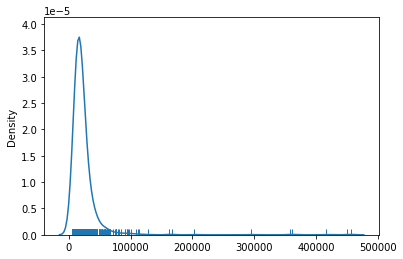

In [ ]:
sns.distplot(clean_df[['NIL Value']], hist=False, rug=True)

## Football v Basketball

In [ ]:
clean_df[clean_df['Sport']=='Football'].describe()

,Total Followers,Height_in_Inches,Weight_in_Kg,Followers Instagram,Followers Tiktok,Followers Twitter,NIL Value,Legacy
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.0
mean,10996.384051,73.871677,220.794225,6064.926673,3427.060495,1504.396884,22348.212649,0.0
std,21594.468273,7.504741,50.456736,7827.105427,17492.556279,2420.842764,19639.453925,0.0
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5500.000000,0.0
25%,2500.000000,72.000000,185.000000,2000.000000,0.000000,0.000000,13900.000000,0.0
50%,4900.000000,74.000000,210.000000,3500.000000,0.000000,0.000000,18700.000000,0.0
75%,10856.000000,76.000000,250.500000,7450.000000,305.000000,2300.000000,25000.000000,0.0
max,413000.000000,200.000000,391.000000,97000.000000,395000.000000,15500.000000,361000.000000,0.0


In [ ]:
clean_df[clean_df['Sport']=='Basketball'].describe()

,Total Followers,Height_in_Inches,Weight_in_Kg,Followers Instagram,Followers Tiktok,Followers Twitter,NIL Value,Legacy
count,2.930000e+02,293.000000,293.000000,293.000000,2.930000e+02,293.000000,293.000000,293.0
mean,3.313584e+04,77.313993,190.047782,21764.805461,8.578375e+03,2792.662116,25570.989761,0.0
std,1.215335e+05,3.620297,23.083628,61443.675973,8.258140e+04,5286.995270,50238.637488,0.0
min,3.500000e+02,61.000000,125.000000,1.000000,0.000000e+00,1.000000,5100.000000,0.0
25%,6.600000e+03,75.000000,175.000000,4200.000000,1.920000e+02,795.000000,11400.000000,0.0
50%,1.073300e+04,78.000000,185.000000,7900.000000,9.690000e+02,1300.000000,14900.000000,0.0
75%,2.300000e+04,80.000000,200.000000,15400.000000,2.100000e+03,2400.000000,21000.000000,0.0
max,1.807800e+06,89.000000,300.000000,580000.000000,1.400000e+06,39000.000000,457000.000000,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

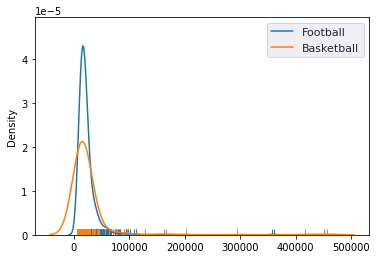

In [ ]:
f, ax = plt.subplots(1, 1)

sns.set(rc = {'figure.figsize':(15,6)})

sns.distplot(clean_df[clean_df['Sport']=='Football'][['NIL Value']], hist=False, rug=True, label='Football')
sns.distplot(clean_df[clean_df['Sport']=='Basketball'][['NIL Value']], hist=False, rug=True, label='Basketball')
ax.legend()

plt.show()

## Height v NIL Value

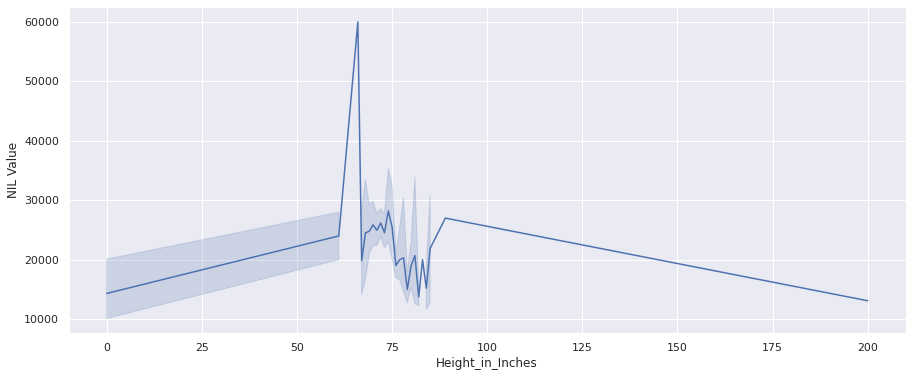

In [ ]:
sns.lineplot(data=clean_df, x="Height_in_Inches", y="NIL Value")

## Weight v NIL Value

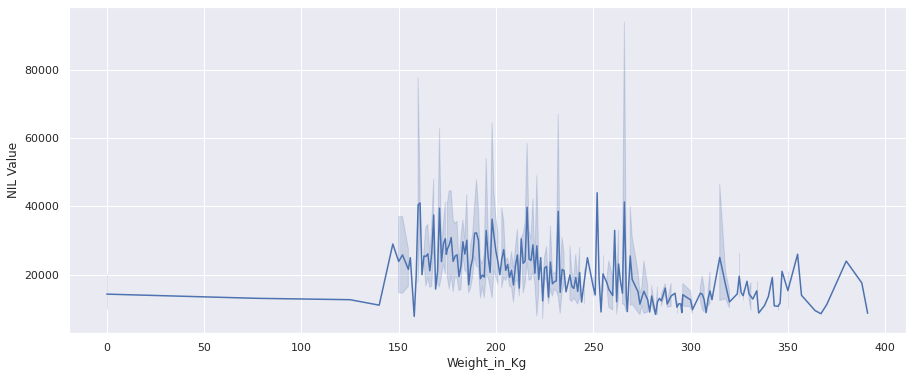

In [ ]:
sns.lineplot(data=clean_df, x="Weight_in_Kg", y="NIL Value")

## Insta Followers v NIL Value

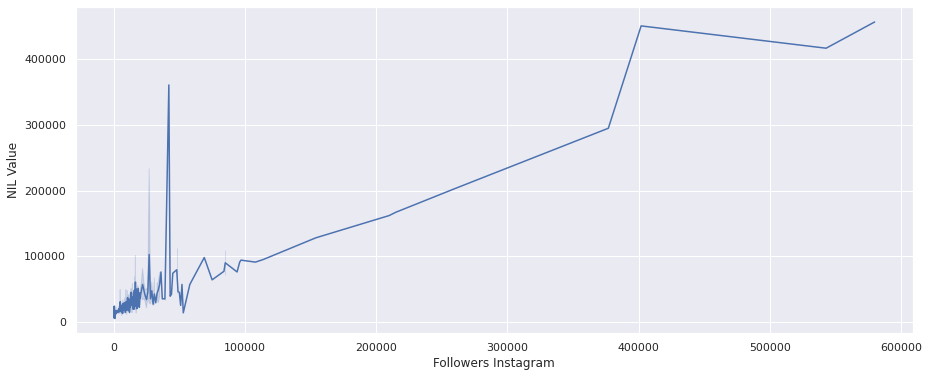

In [ ]:
sns.lineplot(data=clean_df, x="Followers Instagram", y="NIL Value")

## Tiktok Followers v NIL Value

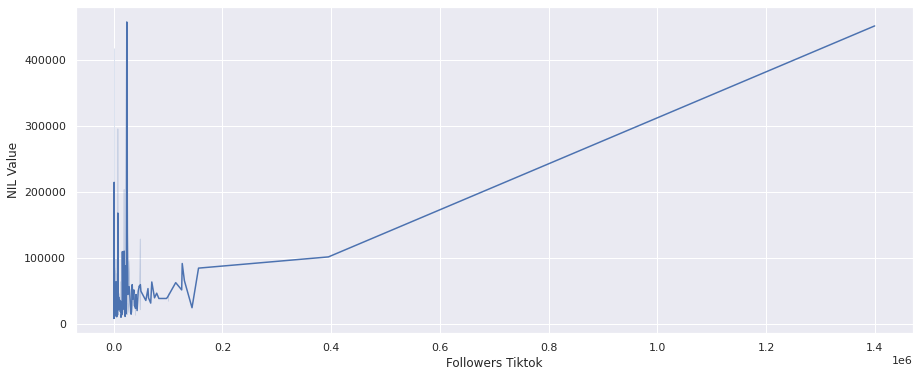

In [ ]:
sns.lineplot(data=clean_df, x="Followers Tiktok", y="NIL Value")

## Twitter Followers v NIL Value

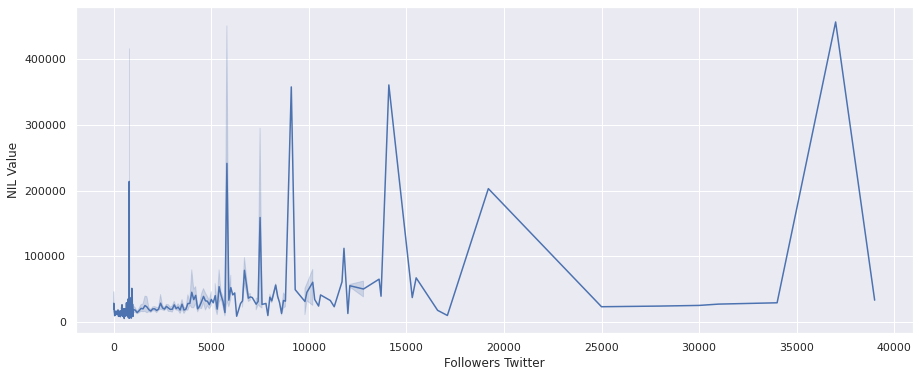

In [ ]:
sns.lineplot(data=clean_df, x="Followers Twitter", y="NIL Value")

## Total Followers v NIL Value

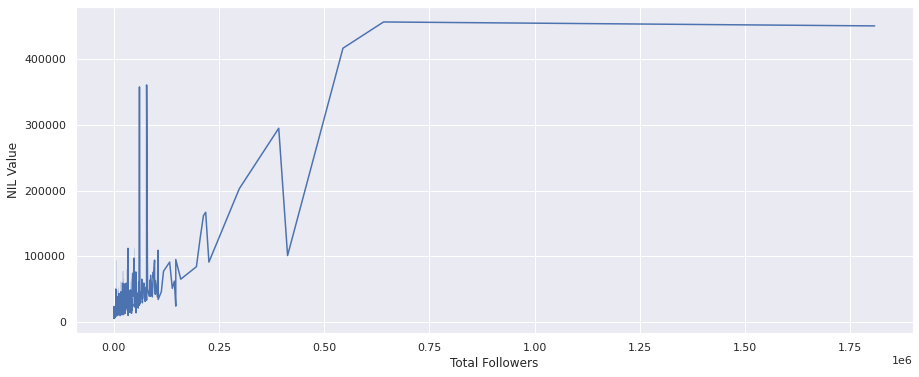

In [ ]:
sns.lineplot(data=clean_df, x="Total Followers", y="NIL Value")

## School v NIL Value

Since there are so many different schools, we are going to look at the top 100

### Total NIL Value by School

In [ ]:
sum_schools_df = clean_df.copy()

In [ ]:
sum_schools_df = sum_schools_df.groupby('School').agg({'NIL Value' : 'sum'}).reset_index().sort_values(['NIL Value'],ascending=False)

sum_schools_df.head()

,School,NIL Value
381,IMG Academy,993100
713,Sierra Canyon,506200
726,Southern California Academy,500400
131,Centennial,467700
488,Long Beach Poly,402800


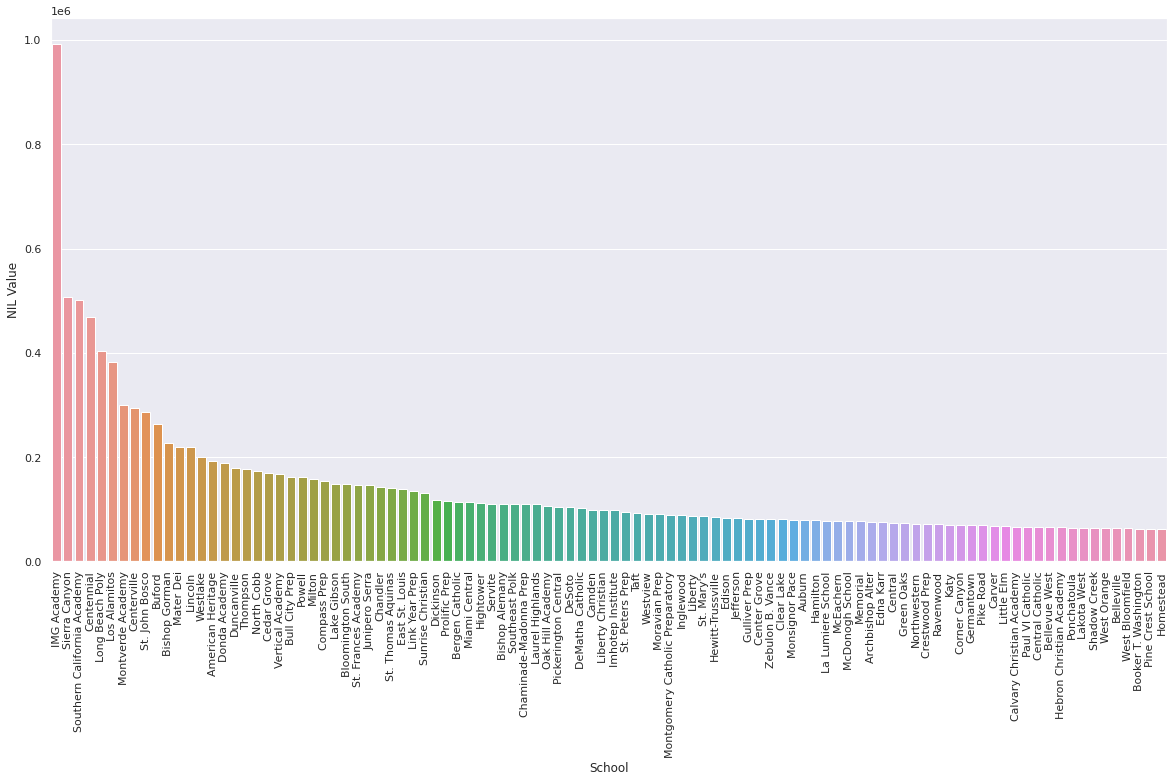

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=sum_schools_df.head(100), x="School", y="NIL Value")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

### Count of Athletes by School

In [ ]:
count_schools_df = clean_df.copy()

In [ ]:
count_schools_df = count_schools_df.groupby('School').agg({'NIL Value' : 'count'}).reset_index().sort_values(['NIL Value'],ascending=False)

count_schools_df.head()

,School,NIL Value
381,IMG Academy,35
744,St. John Bosco,12
526,Mater Dei,9
65,Bishop Gorman,9
740,St. Frances Academy,9


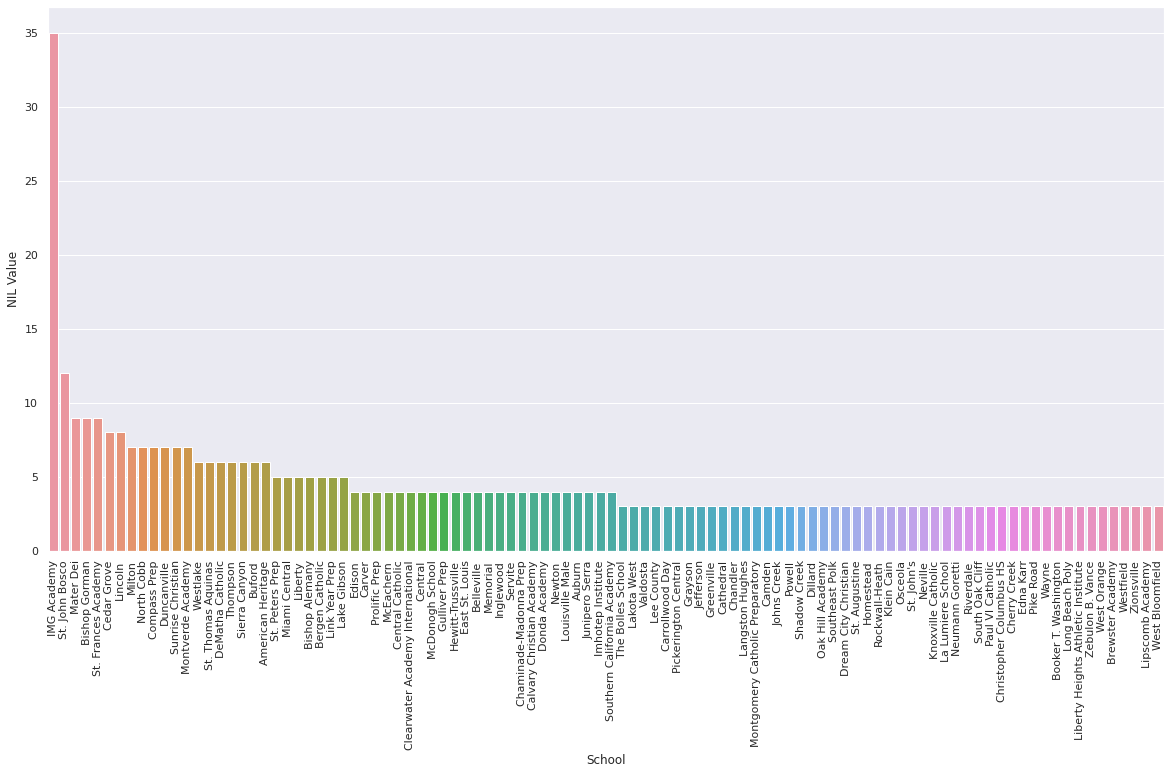

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=count_schools_df.head(100), x="School", y="NIL Value")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

### Largets NIL Value by School

In [ ]:
max_schools_df = clean_df.copy()

In [ ]:
max_schools_df = max_schools_df.groupby('School').agg({'NIL Value' : 'max'}).reset_index().sort_values(['NIL Value'],ascending=False)

max_schools_df.head()

,School,NIL Value
726,Southern California Academy,457000
131,Centennial,451000
713,Sierra Canyon,417000
488,Long Beach Poly,361000
491,Los Alamitos,358000


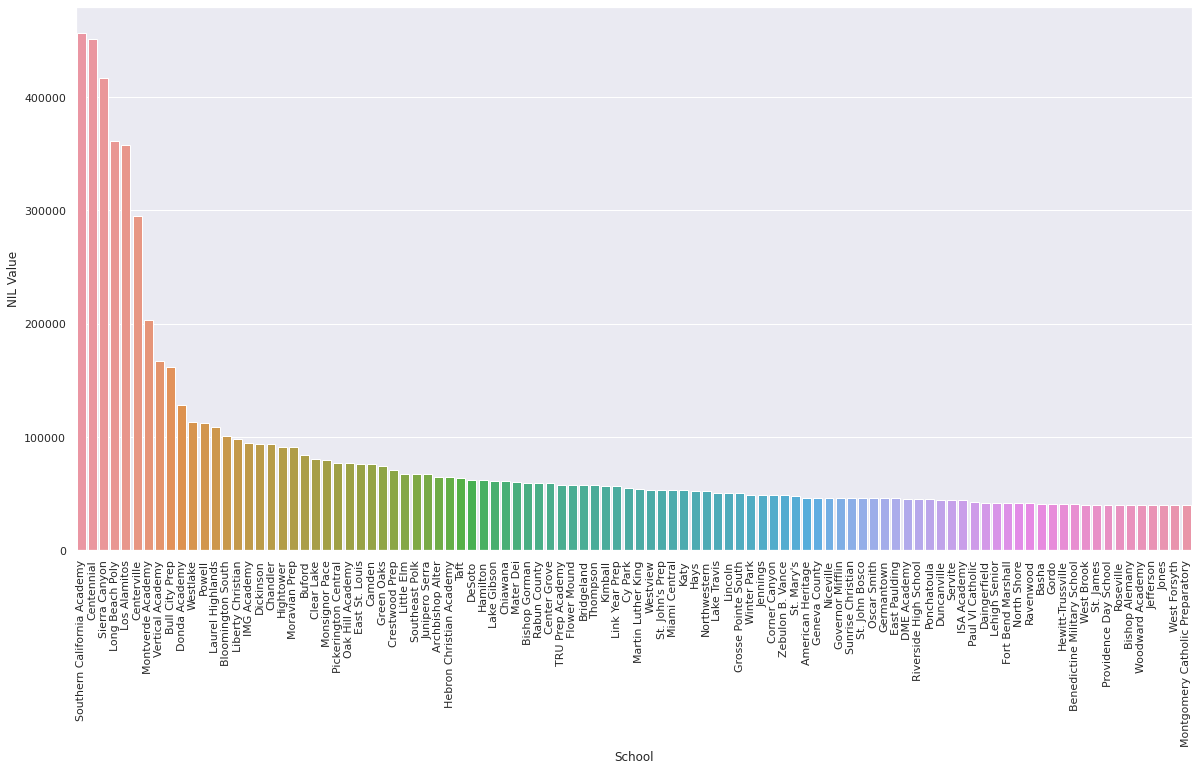

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=max_schools_df.head(100), x="School", y="NIL Value")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

# Label Encoding Categorical Values

In [ ]:
train_df = clean_df.copy()

In [ ]:
#number of unique values
train_df.nunique()

Sport                    2
School                 879
Hometown               704
Position                21
Total Followers        823
Height_in_Inches        24
Weight_in_Kg           179
Followers Instagram    306
Followers Tiktok       420
Followers Twitter      237
NIL Value              206
Legacy                   1
dtype: int64

In [ ]:
train_df.School.value_counts().value_counts()

1     626
2     153
3      49
4      24
6       7
5       7
7       6
9       3
8       2
35      1
12      1
Name: School, dtype: int64

## Grouping Schools to reduce dimensionality

Since there is a lot of variance for schools that even appear once or twice, we cannot reduce schools into groups of how many times they occur.

### Schools that only appear once

In [ ]:
school_df = train_df.copy()

In [ ]:
school_df = school_df[school_df.groupby('School').School.transform(len) == 1]

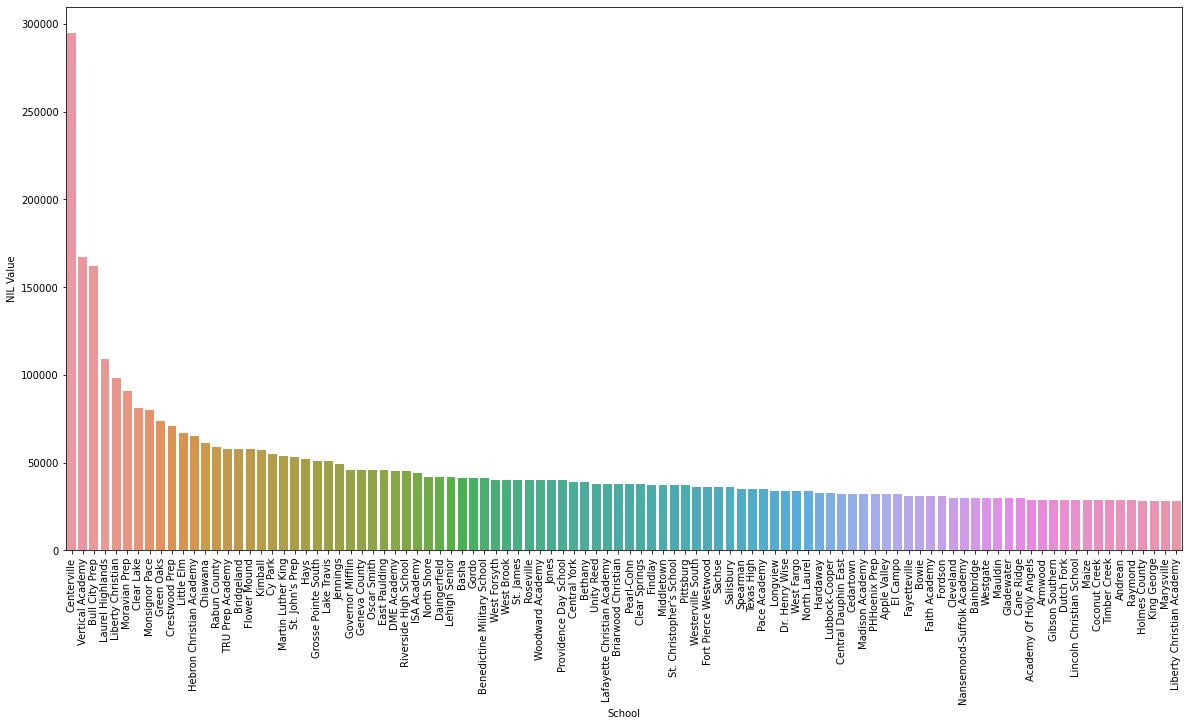

In [ ]:
max_schools_df = school_df.copy()
max_schools_df = max_schools_df.groupby('School').agg({'NIL Value' : 'max'}).reset_index().sort_values(['NIL Value'],ascending=False)
plt.figure(figsize=(20,10))
ax = sns.barplot(data=max_schools_df.head(100), x="School", y="NIL Value")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

### Schools that appear twice

In [ ]:
school_df = train_df.copy()

In [ ]:
school_df = school_df[school_df.groupby('School').School.transform(len) == 2]

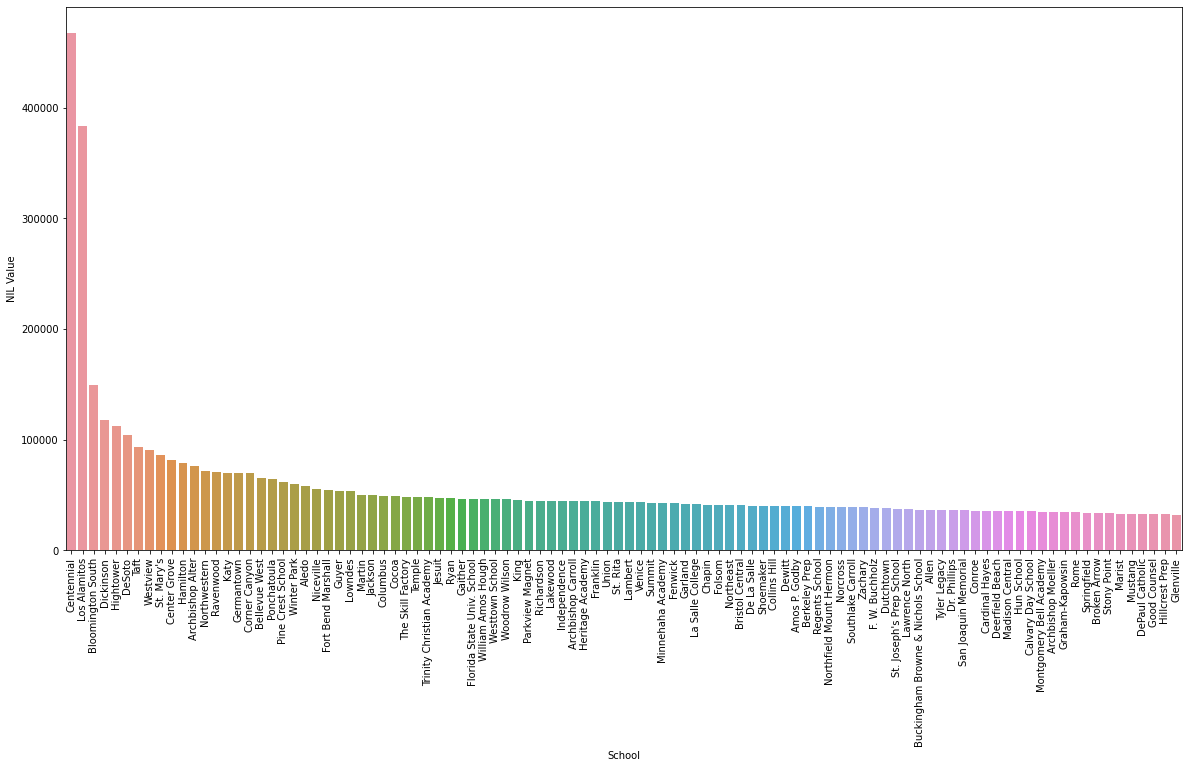

In [ ]:
sum_schools_df = school_df.copy()
sum_schools_df = sum_schools_df.groupby('School').agg({'NIL Value' : 'sum'}).reset_index().sort_values(['NIL Value'],ascending=False)
plt.figure(figsize=(20,10))
ax = sns.barplot(data=sum_schools_df.head(100), x="School", y="NIL Value")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

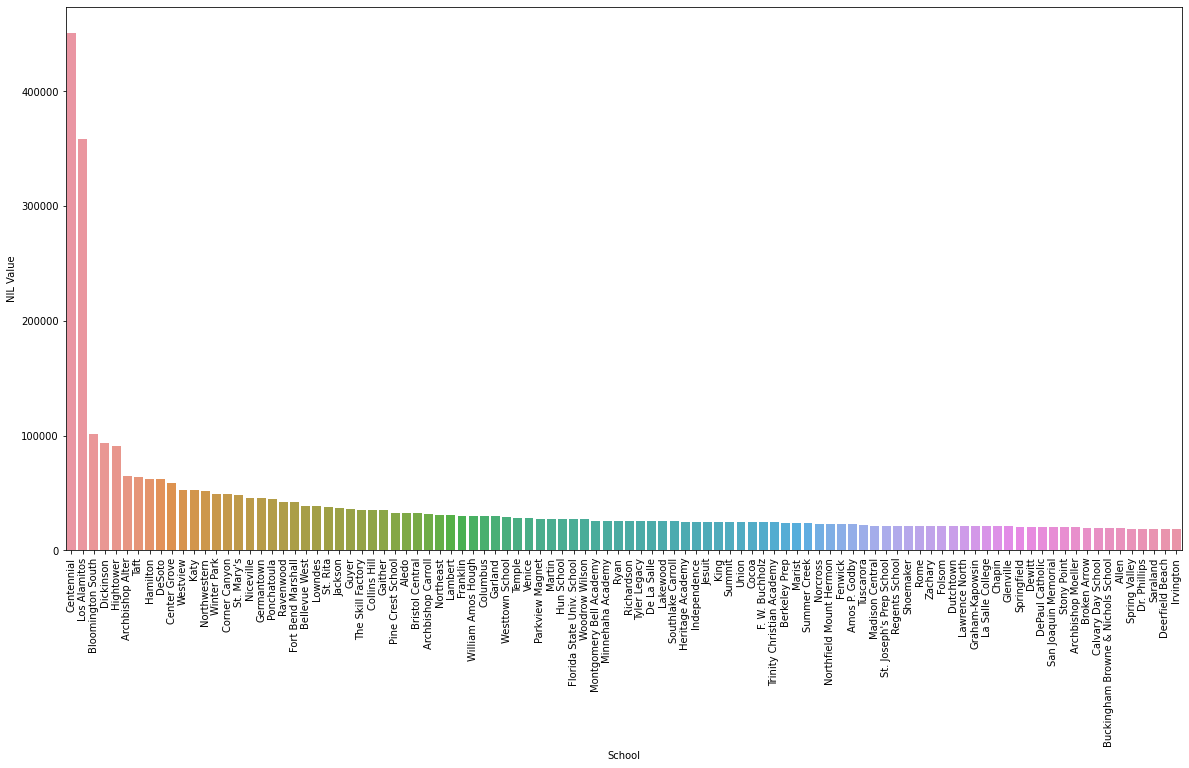

In [ ]:
max_schools_df = school_df.copy()
max_schools_df = max_schools_df.groupby('School').agg({'NIL Value' : 'max'}).reset_index().sort_values(['NIL Value'],ascending=False)
plt.figure(figsize=(20,10))
ax = sns.barplot(data=max_schools_df.head(100), x="School", y="NIL Value")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

## Grouping School and Hometown into bins by NIL Value

We are creating 10 bins of the NIL Value so that the bottom 10% will be in bin 1, next 10% will be in bin 2, etc, top 10% will be in bin 10.

We will place schools and hometowns into those bins depneding on their max NIL value

In [ ]:
train_df['Bins'] = pd.cut(train_df['NIL Value'], bins=10, labels=range(1,11))
train_df.sample(5)

,Sport,School,Hometown,Position,Total Followers,Height_in_Inches,Weight_in_Kg,Followers Instagram,Followers Tiktok,Followers Twitter,NIL Value,Legacy,Bins
1268,Basketball,Compass Prep,"Los Angeles, CA",PG,20951,76,180.0,20000,91,860,26000,0,1
171,Football,Archbishop Alter,"Dayton, OH",LB,66600,75,210.0,27000,26000,13600,65000,0,2
882,Football,Pace Academy,"Atlanta, GA",QB,33600,73,191.0,10800,17300,5500,35000,0,1
1390,Basketball,West Side,"Gary, IN",PF,11900,82,210.0,6900,2500,2500,15900,0,1
573,Football,Junipero Serra,"Los Angeles, CA",ATH,23000,75,180.0,23000,0,0,37000,0,1


In [ ]:
train_df[train_df['Bins'] > 3].sample(5)

,Sport,School,Hometown,Position,Total Followers,Height_in_Inches,Weight_in_Kg,Followers Instagram,Followers Tiktok,Followers Twitter,NIL Value,Legacy,Bins
1219,Basketball,Centennial,"Corona, CA",SG,1807800,74,175.0,402000,1400000,5800,451000,0,10
1220,Basketball,Sierra Canyon,"Chatsworth, CA",CG,544590,78,190.0,543000,795,795,417000,0,10
907,Football,Long Beach Poly,"Long Beach, CA",QB,78100,77,195.0,42000,22000,14100,361000,0,8
1223,Basketball,Vertical Academy,"Fayetteville, NC",PG,218400,74,170.0,215000,1700,1700,167000,0,4
1224,Basketball,Bull City Prep,"Syracuse, NY",PF,213200,81,215.0,210000,1600,1600,162000,0,4


In [ ]:
school_max_bin_df = train_df.copy()
school_max_bin_df = school_max_bin_df.groupby('School').Bins.max()

In [ ]:
type(school_max_bin_df.sample(5))

pandas.core.series.Series

In [ ]:
train_df['School Max Group'] = train_df.School.map(school_max_bin_df) 
train_df[['School', 'School Max Group']].sample(5)

,School,School Max Group
709,Atascocita,1
827,Nease,1
1279,Northfield Mount Hermon,1
1066,Bergen Catholic,1
913,Colonial Forge,1


In [ ]:
school_count_bin_df = train_df.copy()
school_count_bin_df = school_count_bin_df.groupby('School')['NIL Value'].count()

In [ ]:
train_df['School Count Group'] = train_df.School.map(school_count_bin_df) 
train_df[['School', 'School Count Group']].sample(5)

,School,School Count Group
65,Wylie East,1
832,Naaman Forest,1
1267,Huntington Prep,1
1124,Conroe,2
1567,Ballard,1


In [ ]:
hometown_bin_df = train_df.copy()
hometown_bin_df = hometown_bin_df.groupby('Hometown').Bins.max()

In [ ]:
hometown_bin_df.sample(5)

Hometown
Sergeant Bluff, IA    1
Owasso, OK            1
York, PA              1
Hartford, AL          1
Orange, TX            1
Name: Bins, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [ ]:
train_df['Hometown Max Group'] = train_df.Hometown.map(hometown_bin_df) 
train_df[['Hometown', 'Hometown Max Group']].sample(5)

,Hometown,Hometown Max Group
635,"Pensacola, FL",1
120,"Pilot Mountain, NC",1
482,"Washington, DC",1
777,"Southlake, TX",1
929,"Clayton, NC",1


In [ ]:
hometown_count_bin_df = train_df.copy()
hometown_count_bin_df = hometown_count_bin_df.groupby('Hometown')['NIL Value'].count()

In [ ]:
train_df['Hometown Count Group'] = train_df.Hometown.map(hometown_bin_df) 
train_df[['Hometown', 'Hometown Count Group']].sample(5)

,Hometown,Hometown Count Group
816,"Federal Way, WA",1
1302,"Cleveland, OH",1
10,"Myrtle Beach, SC",1
950,"Leesburg, GA",1
1250,"Flint, MI",1


In [ ]:
train_df.columns
train_df

,Sport,School,Hometown,Position,Total Followers,Height_in_Inches,Weight_in_Kg,Followers Instagram,Followers Tiktok,Followers Twitter,NIL Value,Legacy,Bins,School Max Group,School Count Group,Hometown Max Group,Hometown Count Group
0,Football,IMG Academy,"Bradenton, FL",QB,24075,74,221.0,14300,475,9300,49000,0,1,2,35,1,1
1,Football,Central,"Phenix City, AL",CB,9300,73,178.0,9300,0,0,28000,0,1,1,4,1,1
2,Football,Miamisburg,"Miamisburg, OH",IOL,1100,76,233.0,1100,0,0,8700,0,1,1,1,1,1
3,Football,Wayne,"Dayton, OH",OT,6894,78,250.0,4200,94,2600,13300,0,1,1,3,7,7
4,Football,Belleville,"Belleville, MI",LB,1500,73,205.0,1500,0,0,14700,0,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,Basketball,Crosby,"Crosby, TX",CG,4669,75,170.0,3700,56,913,10500,0,1,1,1,1,1
1564,Basketball,Liberty Heights Athletic Institute,"Charlotte, NC",CG,5152,76,180.0,3400,876,876,10300,0,1,1,3,3,3
1566,Basketball,Southern California Academy,"Lewisville, TX",CG,4632,75,160.0,3200,716,716,10100,0,1,10,4,1,1
1567,Basketball,Ballard,"Louisville, KY",CG,3256,75,180.0,2000,628,628,9100,0,1,1,1,1,1


# Saving school group mapping and hometown group mapping

In [ ]:
train_df[['School', 'School Max Group', 'School Count Group']].to_csv('/content/drive/MyDrive/CSDA1050/school_groups.csv')
train_df[['Hometown', 'Hometown Max Group', 'Hometown Count Group']].to_csv('/content/drive/MyDrive/CSDA1050/hometown_groups.csv')

In [ ]:
#dropping hometown and school and bins
train_df = train_df.drop(['Hometown','School','Bins'], axis=1)

# Creating Dummy Variables for Sport and Position

In [ ]:
train_df = pd.get_dummies(train_df,columns=['Sport','Position'],drop_first=True)
train_df.sample(5)

,Total Followers,Height_in_Inches,Weight_in_Kg,Followers Instagram,Followers Tiktok,Followers Twitter,NIL Value,Legacy,School Max Group,School Count Group,...,Position_PF,Position_PG,"Position_PG, SG",Position_QB,Position_RB,Position_S,Position_SF,Position_SG,Position_TE,Position_WR
1456,8327,76,180.0,5000,2800,527,11600,0,1,3,...,0,0,0,0,0,0,0,1,0,0
890,3600,72,178.0,3600,0,0,17100,0,1,4,...,0,0,0,0,0,1,0,0,0,0
244,6606,77,285.0,3200,106,3300,14000,0,1,3,...,0,0,0,0,0,0,0,0,0,0
111,28088,74,315.0,16900,88,11100,31000,0,2,35,...,0,0,0,0,0,0,0,0,0,0
1015,1600,77,228.0,1600,0,0,13400,0,1,3,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
train_df.columns

Index(['Total Followers', 'Height_in_Inches', 'Weight_in_Kg',
       'Followers Instagram', 'Followers Tiktok', 'Followers Twitter',
       'NIL Value', 'Legacy', 'School Max Group', 'School Count Group',
       'Hometown Max Group', 'Hometown Count Group', 'Sport_Football',
       'Position_C', 'Position_CB', 'Position_CG', 'Position_DL',
       'Position_EDGE', 'Position_IOL', 'Position_K', 'Position_LB',
       'Position_OT', 'Position_P', 'Position_PF', 'Position_PG',
       'Position_PG, SG', 'Position_QB', 'Position_RB', 'Position_S',
       'Position_SF', 'Position_SG', 'Position_TE', 'Position_WR'],
      dtype='object')

In [ ]:
train_df = train_df.drop(['Sport', 'Position'], axis=1)

KeyError: ignored

In [ ]:
train_df.to_csv('/content/drive/MyDrive/CSDA1050/nil_value_not_normalized.csv')

# Normalizing All Values

In [ ]:
norm_df = train_df.copy()
norm_df.head()
norm_df = norm_df.drop('NIL Value', axis=1)

norm_df_NIL = train_df[['NIL Value']].copy()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(norm_df) 
norm_df.loc[:,:] = scaled_values

In [ ]:
norm_df.head()

,Total Followers,Height_in_Inches,Weight_in_Kg,Followers Instagram,Followers Tiktok,Followers Twitter,Legacy,School Max Group,School Count Group,Hometown Max Group,...,Position_PF,Position_PG,"Position_PG, SG",Position_QB,Position_RB,Position_S,Position_SF,Position_SG,Position_TE,Position_WR
0,0.013317,0.370,0.565217,0.024653,0.000339,0.238462,0.0,0.111111,1.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.005144,0.365,0.455243,0.016033,0.000000,0.000000,0.0,0.000000,0.088235,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000608,0.380,0.595908,0.001895,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003813,0.390,0.639386,0.007240,0.000067,0.066667,0.0,0.000000,0.058824,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000829,0.365,0.524297,0.002584,0.000000,0.000000,0.0,0.000000,0.088235,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
norm_df = pd.merge(norm_df, norm_df_NIL, left_index=True, right_index=True)

In [ ]:
norm_df.sample(5)

,Total Followers,Height_in_Inches,Weight_in_Kg,Followers Instagram,Followers Tiktok,Followers Twitter,Legacy,School Max Group,School Count Group,Hometown Max Group,...,Position_PG,"Position_PG, SG",Position_QB,Position_RB,Position_S,Position_SF,Position_SG,Position_TE,Position_WR,NIL Value
881,0.018309,0.380,0.524297,0.017240,0.015714,0.028205,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27000
384,0.002959,0.375,0.575448,0.003619,0.000036,0.082051,0.0,0.000000,0.029412,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21000
341,0.005144,0.370,0.501279,0.016033,0.000000,0.000000,0.0,0.000000,0.029412,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49000
1149,0.000995,0.370,0.519182,0.003102,0.000000,0.000000,0.0,0.111111,0.029412,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17100
1157,0.001936,0.375,0.608696,0.006033,0.000000,0.000000,0.0,0.000000,0.029412,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800


# Feature Selection

Feature Correlation - want to remove feaurtes too highly correlated

Feature Importance - determine which features most affect the NIL Value

## Feature Correlation

In [ ]:
corr_df = norm_df.corr().sort_values('NIL Value')
corr_df.style.background_gradient(axis=0) 

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Total Followers,Height_in_Inches,Weight_in_Kg,Followers Instagram,Followers Tiktok,Followers Twitter,Legacy,School Max Group,School Count Group,Hometown Max Group,Hometown Count Group,Sport_Football,Position_C,Position_CB,Position_CG,Position_DL,Position_EDGE,Position_IOL,Position_K,Position_LB,Position_OT,Position_P,Position_PF,Position_PG,"Position_PG, SG",Position_QB,Position_RB,Position_S,Position_SF,Position_SG,Position_TE,Position_WR,NIL Value
Weight_in_Kg,-0.086205,0.374599,1.000000,-0.104899,-0.047048,-0.028705,nan,-0.069677,0.038587,-0.079893,-0.079893,0.263324,0.032710,-0.225712,-0.132006,0.365470,0.063521,0.414441,-0.051348,-0.008296,0.459191,0.007864,-0.016391,-0.194411,-0.024965,-0.081315,-0.110925,-0.170697,-0.112793,-0.129038,0.049134,-0.191987,-0.138053
Position_IOL,-0.044856,-0.002346,0.414441,-0.057201,-0.019266,-0.056364,nan,-0.047912,-0.012916,-0.042367,-0.042367,0.137481,-0.038122,-0.069964,-0.045174,-0.073636,-0.069548,1.000000,-0.017505,-0.071613,-0.071203,-0.012365,-0.050825,-0.056965,-0.007134,-0.069964,-0.069964,-0.070379,-0.059366,-0.050285,-0.067862,-0.072831,-0.096695
Position_OT,-0.042557,0.121978,0.459191,-0.047608,-0.023801,-0.044834,nan,-0.046131,-0.025091,-0.027815,-0.027815,0.139091,-0.038568,-0.070784,-0.045704,-0.074498,-0.070362,-0.071203,-0.017710,-0.072452,1.000000,-0.012510,-0.051420,-0.057632,-0.007217,-0.070784,-0.070784,-0.071203,-0.060061,-0.050874,-0.068657,-0.073684,-0.090735
Position_DL,-0.031821,0.035834,0.365470,-0.034090,-0.021820,0.003085,nan,-0.035646,0.018989,-0.019648,-0.019648,0.143843,-0.039886,-0.073202,-0.047265,1.000000,-0.072766,-0.073636,-0.018315,-0.074926,-0.074498,-0.012937,-0.053177,-0.059601,-0.007464,-0.073202,-0.073202,-0.073636,-0.062113,-0.052612,-0.071002,-0.076201,-0.058132
Sport_Football,-0.151470,-0.200688,0.263324,-0.215482,-0.051277,-0.160216,nan,-0.153233,-0.051340,-0.055974,-0.055974,1.000000,-0.277286,0.136671,-0.328587,0.143843,0.135857,0.137481,0.034196,0.139891,0.139091,-0.013877,-0.369689,-0.414346,-0.051888,0.136671,0.136671,0.137481,-0.431810,-0.365760,0.132564,0.142272,-0.045480
Position_TE,-0.039262,0.127970,0.049134,-0.052572,-0.016709,-0.028580,nan,-0.050641,-0.026628,-0.051650,-0.051650,0.132564,-0.036758,-0.067462,-0.043559,-0.071002,-0.067060,-0.067862,-0.016879,-0.069052,-0.068657,-0.011923,-0.049007,-0.054928,-0.006879,-0.067462,-0.067462,-0.067862,-0.057243,-0.048487,1.000000,-0.070227,-0.042726
Position_SF,0.003824,0.147761,-0.112793,0.018753,-0.012059,0.050245,nan,0.053667,0.032710,-0.028225,-0.028225,-0.431810,-0.032156,-0.059016,-0.038105,-0.062113,-0.058664,-0.059366,-0.014766,-0.060406,-0.060061,-0.010430,-0.042872,-0.048051,-0.006017,-0.059016,-0.059016,-0.059366,1.000000,-0.042416,-0.057243,-0.061434,-0.042014
Position_C,0.004874,0.067519,0.032710,-0.002988,0.009640,-0.004765,nan,0.037297,0.043203,0.019878,0.019878,-0.277286,1.000000,-0.037897,-0.024469,-0.039886,-0.037671,-0.038122,-0.009482,-0.038790,-0.038568,-0.006698,-0.027530,-0.030856,-0.003864,-0.037897,-0.037897,-0.038122,-0.032156,-0.027237,-0.036758,-0.039450,-0.035909
Position_PF,0.003570,0.167718,-0.016391,0.020066,-0.008475,-0.011047,nan,0.082547,0.038832,-0.000276,-0.000276,-0.369689,-0.027530,-0.050526,-0.032623,-0.053177,-0.050225,-0.050825,-0.012642,-0.051716,-0.051420,-0.008929,1.000000,-0.041138,-0.005152,-0.050526,-0.050526,-0.050825,-0.042872,-0.036314,-0.049007,-0.052596,-0.034859
Height_in_Inches,0.000992,1.000000,0.374599,0.009131,-0.009785,0.057547,nan,0.015001,0.011817,-0.020515,-0.020515,-0.200688,0.067519,-0.128400,0.022795,0.035834,0.014529,-0.002346,-0.024488,-0.022721,0.121978,0.027047,0.167718,-0.029452,0.005371,-0.019671,-0.149310,-0.104277,0.147761,0.058147,0.127970,-0.080072,-0.029725


Going to remove Total Followers as that is too highly correlated with Tiktok Followers

In [ ]:
norm_df = norm_df.drop('Total Followers', axis=1)

## Feature Importance

In [ ]:
cols= norm_df.columns.values.tolist()
cols

['Height_in_Inches',
 'Weight_in_Kg',
 'Followers Instagram',
 'Followers Tiktok',
 'Followers Twitter',
 'Legacy',
 'School Max Group',
 'School Count Group',
 'Hometown Max Group',
 'Hometown Count Group',
 'Sport_Football',
 'Position_C',
 'Position_CB',
 'Position_CG',
 'Position_DL',
 'Position_EDGE',
 'Position_IOL',
 'Position_K',
 'Position_LB',
 'Position_OT',
 'Position_P',
 'Position_PF',
 'Position_PG',
 'Position_PG, SG',
 'Position_QB',
 'Position_RB',
 'Position_S',
 'Position_SF',
 'Position_SG',
 'Position_TE',
 'Position_WR',
 'NIL Value']

In [ ]:
cols.remove('NIL Value')
x_cols = cols
target = ['NIL Value']

### XGB Feature Importance

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(norm_df[x_cols], norm_df['NIL Value'].ravel())
importances_xgb = pd.DataFrame(data={
    'Attribute': x_cols,
    'Importance': model.feature_importances_
})
importances_xgb = importances_xgb.sort_values(by='Importance', ascending=False)

[04:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


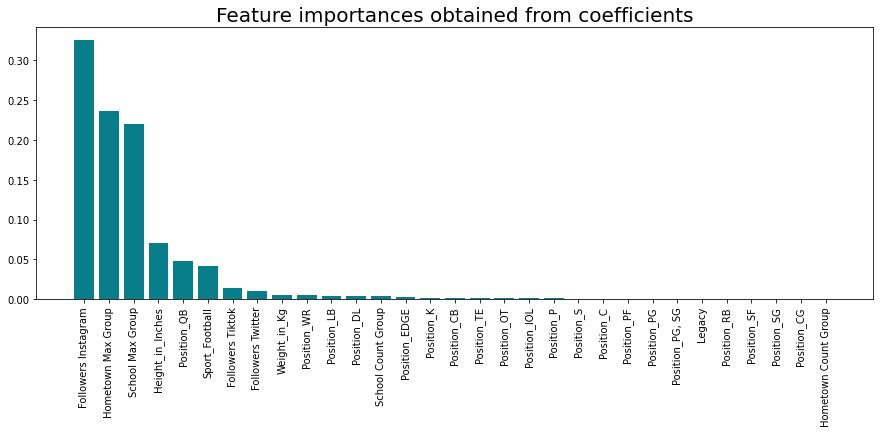

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(x=importances_xgb['Attribute'], height=importances_xgb['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Random Forest Feature Importance

In [ ]:
from sklearn.linear_model import LinearRegression

model = RandomForestRegressor()
model.fit(norm_df[x_cols], norm_df['NIL Value'].ravel())
importances_rdf = pd.DataFrame(data={
    'Attribute': x_cols,
    'Importance': model.feature_importances_
})
importances_rdf = importances_rdf.sort_values(by='Importance', ascending=False)

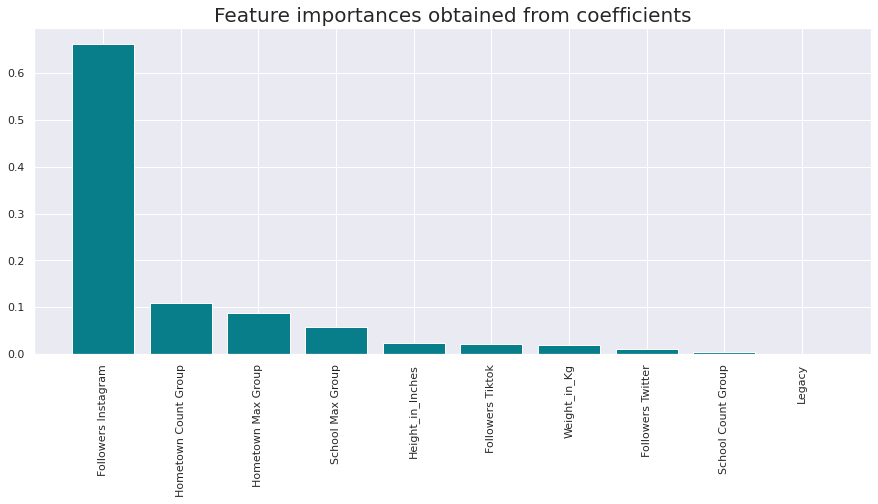

In [ ]:
plt.bar(x=importances_rdf['Attribute'], height=importances_rdf['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
importances = pd.merge(importances_xgb, importances_rdf, on='Attribute')
importances.sort_values(['Importance_y', 'Importance_x'])

,Attribute,Importance_x,Importance_y
8,Legacy,0.000000,0.000000
6,School Count Group,0.007706,0.005641
5,Followers Twitter,0.012289,0.011025
7,Weight_in_Kg,0.005105,0.019508
4,Followers Tiktok,0.018080,0.022563
3,Height_in_Inches,0.073254,0.023961
2,School Max Group,0.200562,0.057750
1,Hometown Max Group,0.264686,0.088174
9,Hometown Count Group,0.000000,0.109099
0,Followers Instagram,0.418318,0.662279


The following have essentially 0 impact on the NIL Value for both (less than 0.0001): Legacy, Position_PG, SG, Position_PF, Position_P, Position_C, Position_OT, Position_IOL

In [ ]:
x_cols

['Height_in_Inches',
 'Weight_in_Kg',
 'Followers Instagram',
 'Followers Tiktok',
 'Followers Twitter',
 'School Max Group',
 'School Count Group',
 'Hometown Max Group',
 'Hometown Count Group']

In [ ]:
x_cols.remove('Legacy')
x_cols.remove('Position_PG, SG')
x_cols.remove('Position_PF')
x_cols.remove('Position_P')
x_cols.remove('Position_C')
x_cols.remove('Position_OT')
x_cols.remove('Position_IOL')

ValueError: ignored

#Saving data to csv file

In [ ]:
norm_df.to_csv('/content/drive/MyDrive/CSDA1050/nil_value_data.csv')

# BasketBall / Football Model

## Stacking

### Extreme Gradient Boost (XGB) Outperforms all other models and the stacking model
We will use only the Random Forest Regressor

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import RocCurveDisplay
from numpy import mean
from numpy import std

In [ ]:
X = norm_df[x_cols]
y = norm_df[target]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(norm_df[x_cols], norm_df[target], test_size=0.33, random_state=42)

*   5 Base models - KNR, Decision Tree, SVR (Support Vector Machine for Regression), XGBRegressor, Random Forest

*   1 Meta-Model - Linear Regression



In [ ]:
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('knn', KNeighborsRegressor()))
  level0.append(('decision_tree', DecisionTreeRegressor()))
  level0.append(('svm', SVR()))
  level0.append(('xgb_regressor', XGBRegressor()))
  level0.append(('random_forest', RandomForestRegressor()))
  # define meta learner model
  level1 = LinearRegression()
  # define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
  return model

In [ ]:
def get_models():
  models = dict()
  models['knn'] = KNeighborsRegressor()
  models['decision_tree'] = DecisionTreeRegressor()
  models['svm'] = SVR()
  models['xgb_regressor'] = XGBRegressor()
  models['random_forest'] = RandomForestRegressor()
  models['stacking'] = get_stacking()
  return models

In [ ]:
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>knn -7432.020 (1404.583)
>decision_tree -5024.991 (1421.084)
>svm -10254.788 (1720.817)
>xgb_regressor -3788.347 (861.866)
>random_forest -3979.134 (902.760)
>stacking -5615.100 (1329.274)


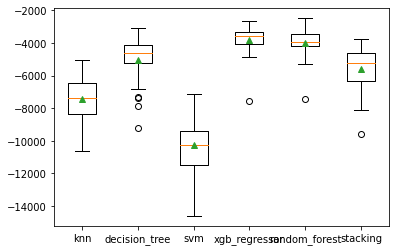

In [ ]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Model Evaluation

In [ ]:
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score


In [ ]:
y_train = y_train['NIL Value'].ravel()
y_test = y_test['NIL Value'].ravel()

In [ ]:
rfr = XGBRegressor()
rfr.fit(x_train, y_train)
y_predicted = rfr.predict(x_test)

[04:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('max_error\t\t', max_error(y_test, y_predicted))
print('mean_absolute_error\t', mean_absolute_error(y_test, y_predicted))
print('mean_squared_error\t', mean_squared_error(y_test, y_predicted))
print('median_absolute_error\t', median_absolute_error(y_test, y_predicted))
print('r2_score\t\t', r2_score(y_test, y_predicted))


max_error		 63797.26953125
mean_absolute_error	 3711.8104827680527
mean_squared_error	 45190087.50450468
median_absolute_error	 2309.4296875
r2_score		 0.9499202580600346


## Plotting the R2 Score

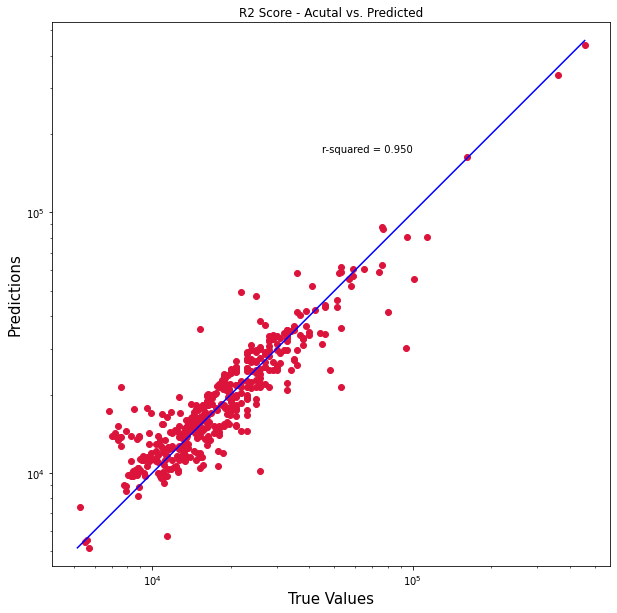

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')

plt.title('R2 Score - Acutal vs. Predicted')
plt.figtext(0.5, 0.7, s="r-squared = {:.3f}".format(r2_score(y_test, y_predicted)))
p1 = max(max(y_predicted), max(y_test))
p2 = min(min(y_predicted), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Hockey Model

To extrapolate for hockey, we need to remove all football/basketball specific features

In [ ]:
#hockey_df = norm_df[norm_df['Sport_Football'] == 1].copy()
hockey_df = norm_df.copy()
hockey_df

,Height_in_Inches,Weight_in_Kg,Followers Instagram,Followers Tiktok,Followers Twitter,Legacy,School Max Group,School Count Group,Hometown Max Group,Hometown Count Group,...,Position_PG,"Position_PG, SG",Position_QB,Position_RB,Position_S,Position_SF,Position_SG,Position_TE,Position_WR,NIL Value
0,0.370,0.565217,0.024653,0.000339,0.238462,0.0,0.111111,1.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49000
1,0.365,0.455243,0.016033,0.000000,0.000000,0.0,0.000000,0.088235,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28000
2,0.380,0.595908,0.001895,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8700
3,0.390,0.639386,0.007240,0.000067,0.066667,0.0,0.000000,0.058824,0.666667,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13300
4,0.365,0.524297,0.002584,0.000000,0.000000,0.0,0.000000,0.088235,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,0.375,0.434783,0.006378,0.000040,0.023410,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10500
1564,0.380,0.460358,0.005860,0.000626,0.022462,0.0,0.000000,0.058824,0.222222,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10300
1566,0.375,0.409207,0.005516,0.000511,0.018359,0.0,1.000000,0.088235,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10100
1567,0.375,0.460358,0.003447,0.000449,0.016103,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9100


In [ ]:
hockey_df = hockey_df[hockey_df.columns.drop(list(hockey_df.filter(regex='Position')))]
hockey_df = hockey_df[hockey_df.columns.drop(list(hockey_df.filter(regex='Sport')))]
hockey_df.columns

Index(['Height_in_Inches', 'Weight_in_Kg', 'Followers Instagram',
       'Followers Tiktok', 'Followers Twitter', 'Legacy', 'School Max Group',
       'School Count Group', 'Hometown Max Group', 'Hometown Count Group',
       'NIL Value'],
      dtype='object')

## Feature Correlation

In [ ]:
hockey_corr_df = hockey_df.corr()
hockey_corr_df.style.background_gradient(axis=0) 

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Height_in_Inches,Weight_in_Kg,Followers Instagram,Followers Tiktok,Followers Twitter,Legacy,School Max Group,School Count Group,Hometown Max Group,Hometown Count Group,NIL Value
Height_in_Inches,1.000000,0.374599,0.009131,-0.009785,0.057547,nan,0.015001,0.011817,-0.020515,-0.020515,-0.029725
Weight_in_Kg,0.374599,1.000000,-0.104899,-0.047048,-0.028705,nan,-0.069677,0.038587,-0.079893,-0.079893,-0.138053
Followers Instagram,0.009131,-0.104899,1.000000,0.367110,0.320278,nan,0.468813,0.051741,0.524149,0.524149,0.847102
Followers Tiktok,-0.009785,-0.047048,0.367110,1.000000,0.092404,nan,0.242291,0.011457,0.277735,0.277735,0.450656
Followers Twitter,0.057547,-0.028705,0.320278,0.092404,1.000000,nan,0.181681,0.103682,0.182570,0.182570,0.350444
Legacy,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
School Max Group,0.015001,-0.069677,0.468813,0.242291,0.181681,nan,1.000000,0.184751,0.588797,0.588797,0.515324
School Count Group,0.011817,0.038587,0.051741,0.011457,0.103682,nan,0.184751,1.000000,0.018331,0.018331,0.050994
Hometown Max Group,-0.020515,-0.079893,0.524149,0.277735,0.182570,nan,0.588797,0.018331,1.000000,1.000000,0.591740
Hometown Count Group,-0.020515,-0.079893,0.524149,0.277735,0.182570,nan,0.588797,0.018331,1.000000,1.000000,0.591740


In [ ]:
hockey_df = hockey_df.drop('Legacy', axis=1)
hockey_df.columns

Index(['Height_in_Inches', 'Weight_in_Kg', 'Followers Instagram',
       'Followers Tiktok', 'Followers Twitter', 'School Max Group',
       'School Count Group', 'Hometown Max Group', 'Hometown Count Group',
       'NIL Value'],
      dtype='object')

## Feature Importance

In [ ]:
cols= hockey_df.columns.values.tolist()
cols

['Height_in_Inches',
 'Weight_in_Kg',
 'Followers Instagram',
 'Followers Tiktok',
 'Followers Twitter',
 'School Max Group',
 'School Count Group',
 'Hometown Max Group',
 'Hometown Count Group',
 'NIL Value']

In [ ]:
cols.remove('NIL Value')
x_cols = cols
target = ['NIL Value']

### XGB Feature Importance

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(norm_df[x_cols], norm_df['NIL Value'].ravel())
importances_xgb = pd.DataFrame(data={
    'Attribute': x_cols,
    'Importance': model.feature_importances_
})
importances_xgb = importances_xgb.sort_values(by='Importance', ascending=False)

[04:40:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


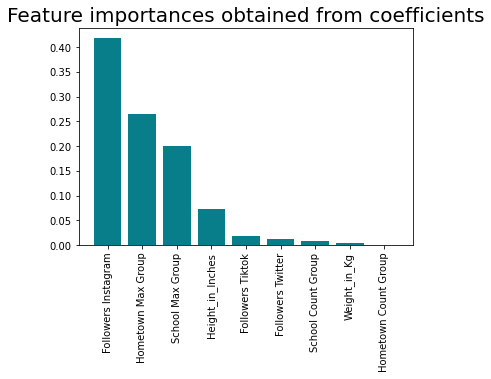

In [ ]:
plt.bar(x=importances_xgb['Attribute'], height=importances_xgb['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Random Forest Feature Selection

In [ ]:
from sklearn.linear_model import LinearRegression

model = RandomForestRegressor()
model.fit(norm_df[x_cols], norm_df['NIL Value'].ravel())
importances_rdf = pd.DataFrame(data={
    'Attribute': x_cols,
    'Importance': model.feature_importances_
})
importances_rdf = importances_rdf.sort_values(by='Importance', ascending=False)

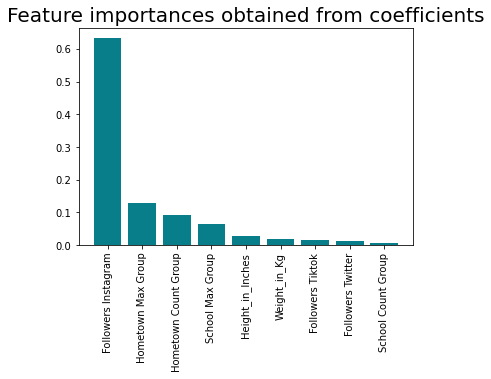

In [ ]:
plt.bar(x=importances_rdf['Attribute'], height=importances_rdf['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
importances = pd.merge(importances_xgb, importances_rdf, on='Attribute')
importances.sort_values(['Importance_x', 'Importance_y'])

,Attribute,Importance_x,Importance_y
8,Hometown Count Group,0.000000,0.092263
7,Weight_in_Kg,0.005105,0.017444
6,School Count Group,0.007706,0.005564
5,Followers Twitter,0.012289,0.013625
4,Followers Tiktok,0.018080,0.016786
3,Height_in_Inches,0.073254,0.027207
2,School Max Group,0.200562,0.065858
1,Hometown Max Group,0.264686,0.128051
0,Followers Instagram,0.418318,0.633202


All features have an impact on the NIL Value, so we won't remove any.

## Stacking Model

In [ ]:
X_hockey = hockey_df[x_cols]
y_hockey = hockey_df[target]

In [ ]:
x_train_hockey, x_test_hockey, y_train_hockey, y_test_hockey = train_test_split(hockey_df[x_cols], hockey_df[target], test_size=0.33, random_state=42)

>knn -7395.843 (1333.967)
>decision_tree -6192.084 (1237.286)
>svm -10264.718 (1721.007)
>xgb_regressor -4598.155 (856.953)
>random_forest -4760.585 (885.060)
>stacking -6548.291 (1098.401)


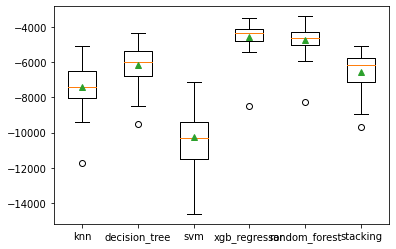

<Figure size 720x720 with 0 Axes>

In [ ]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_hockey, y_hockey)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
plt.figure(figsize=(10,10))
pyplot.show()

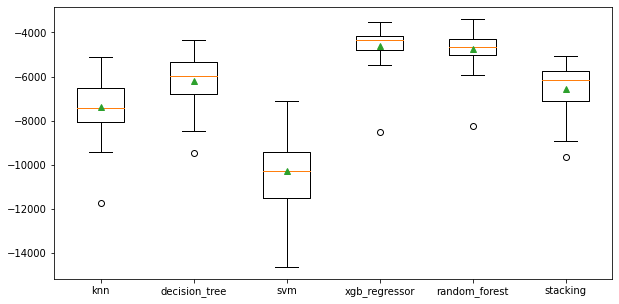

In [ ]:
pyplot.figure(figsize=(10,5))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Model Evaluation

In [ ]:
y_train_hockey = y_train_hockey['NIL Value'].ravel()
y_test_hockey = y_test_hockey['NIL Value'].ravel()

In [ ]:
rfr = XGBRegressor()
rfr.fit(x_train_hockey, y_train_hockey)
y_predicted_hockey = rfr.predict(x_test_hockey)

[04:42:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('max_error\t\t', max_error(y_test_hockey, y_predicted_hockey))
print('mean_absolute_error\t', mean_absolute_error(y_test_hockey, y_predicted_hockey))
print('mean_squared_error\t', mean_squared_error(y_test_hockey, y_predicted_hockey))
print('median_absolute_error\t', median_absolute_error(y_test_hockey, y_predicted_hockey))
print('r2_score\t\t', r2_score(y_test_hockey, y_predicted_hockey))


max_error		 70672.654296875
mean_absolute_error	 4266.866251538567
mean_squared_error	 52858822.63448043
median_absolute_error	 2703.97265625
r2_score		 0.941421751030659


### Plotting R2 Score

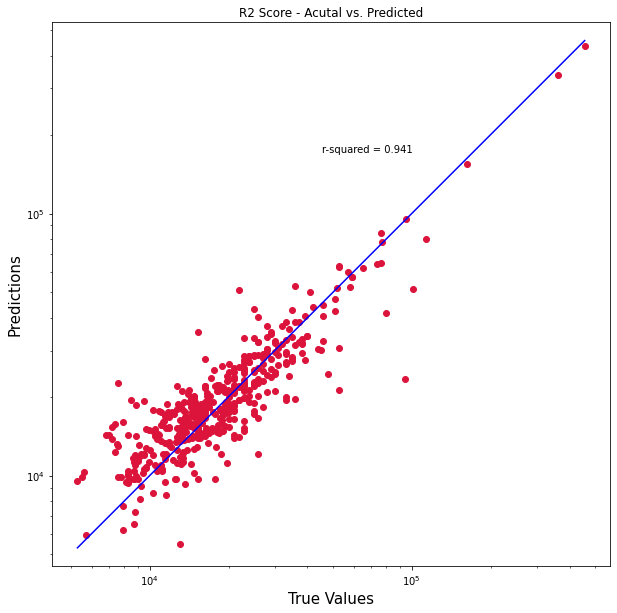

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test_hockey, y_predicted_hockey, c='crimson')
plt.yscale('log')
plt.xscale('log')

plt.title('R2 Score - Acutal vs. Predicted')
plt.figtext(0.5, 0.7, s="r-squared = {:.3f}".format(r2_score(y_test_hockey, y_predicted_hockey)))
p1 = max(max(y_predicted_hockey), max(y_test_hockey))
p2 = min(min(y_predicted_hockey), min(y_test_hockey))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()